<a href="https://colab.research.google.com/github/mikiemac1975/GIS_COURSE_Michelle/blob/master/Comparing_datasets_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Welcome to your Python notebook##
Firstly, we need to import the tools that you will need to allow Python to work with all the information from your files.

Tool - 

<font color='blue'> Pandas </font>


In [17]:
import folium
import branca
import pandas as pd
print(folium.__file__)
print(folium.__version__)

/usr/local/lib/python3.6/dist-packages/folium/__init__.py
0.8.3


Next, upload the dataset containing the information you will use to create your map. Give it a name - In this case, ours are called vetera and rottweil.

By entering the command pd.read_csv , you are asking the notebook to read the file using the pandas tool you have just imported. As you can see from the URL, I have uploaded the datasets from my Github account.

By adding the command .head() on the second line of this section of code, you are able to view the first few lines of the dataset in the notebook.

In [18]:
vetera = pd.read_csv('https://raw.githubusercontent.com/mikiemac1975/GIS_COURSE_Michelle/master/Vetera_REDUCED_25Jul2011.csv')
vetera.head()

,Site Name,Cat_No,Trench,X coordinate,Y coordinate,Quantity,Activity category,act_cat,Material,Material detail original,Type,Sub-type,Description,Inventory number,Date,Period original,Period,Camp,Building,Gender,Gender code,Height (cm),Length (cm),Rim diam. (cm),Base diam. (cm),Wall diam. (cm),Diam. (cm),Width (cm),Max. dim. (cm),Weight (g),Surface,Fragment section,Hardness,Fabric,Colour,Published illustration,Published references
0,Vetera,B0001,1267.0,-867.37500,-91.84961,1.0,dress,D,Copper alloy,NaN,Finger-rings,NaN,"Fragment with oval, red-brown incised glass inlay",34398,NaN,NaN,NaN,NaN,Z,male?/female?,ZMa_Fe,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN
1,Vetera,B0002,475.0,59.00000,46.27490,1.0,dress,D,Copper alloy,NaN,Brooches,fragment,3 spirals preserved; pin broken.,26012,AD 60s,Neronian,Neronian,Neronian,via principalis west,male,Ma,NaN,2.2 preserved,NaN,NaN,NaN,NaN,1.1 preserved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN
2,Vetera,B0003,982.0,731.50000,-103.22461,1.0,dress,D,Copper alloy,NaN,Brooches,fragment,3 spirals preserved; bow completely corroded; ...,33490,AD 60s,Neronian,Neronian,Claudian-Neronian,F,male,Ma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN
3,Vetera,B0004,26.0,-975.82202,1713.59961,1.0,dress,D,Copper alloy,NaN,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Bow with rounded section; pin missing.,18937,AD 60s,Neronian,Neronian,Claudian-Neronian,Neronian Fortifications,male,Ma,1.6,4.5,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN
4,Vetera,B0005,327.1,514.39235,879.63192,1.0,dress,D,Copper alloy,NaN,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Spiral construction; bow of rounded section; p...,22518,NaN,Augustan-Neronian,Aug_Ner,"B, A-C",G,male,Ma,NaN,3.2 preserved,NaN,NaN,NaN,NaN,0.8 preserved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN


We can import a few more tools here and have a go at plotting what we have...

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
!pip install geopandas
import geopandas as gpd

The data isnt very meaningful at the moment...

Follow the same process as above to upload the next dataset.

The URL for this is https://raw.githubusercontent.com/mikiemac1975/GIS_COURSE_Michelle/master/Rottweil_Reduced_28March2011.csv

In [20]:
rottweil = pd.read_csv('https://raw.githubusercontent.com/mikiemac1975/GIS_COURSE_Michelle/master/Rottweil_Reduced_28March2011.csv')
rottweil.head()

,Site name,Sort No.,Original Cat. No.,Provenance code,X coordinate,Y coordinate,No. artefacts,Activity category,act_cat,Material,Material detail,Type,Sub-type,Description,Inventory Number,Excavation area,Provenance 1,Provenance 2,Stratigraphical info,Other location information,Date,Period,Fort building phase,Building phase reduced,Gender,Gender code,Height (cm),Length (cm),Rim diam. (cm),Max. diam. (cm),Base diam. (cm),Breadth (cm),Thickness (cm),Weight (g),Published illustration,Published parallels and references
0,Rottweil (AF V),1.0,1,1,0.232341,0.036098,1.0,tableware and serving?/toilet?-drinking?,ZTS_TD,Glass,"Natural, ridged",Cups,conical,Wall sherd of a conical cup with faint decorat...,ZV 1114/2.,"Tuttlinger Straße l3, 1980",NaN,Inner trenches,Upper fill,NaN,NaN,NaN,Period I,PI,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 1,NaN
1,Rottweil (AF V),18.0,18,2,0.221898,0.024865,1.0,dress,D,Bone,NaN,Pins,hair,"Hairpin with female bust, with flat back, on a...",ZV 1114/1.,"Tuttlinger Straße l3, 1980",NaN,Outer trench,Upper fill,NaN,c. 80-100 AD,NaN,Period I,PI,female,Fe,3.5 max. (bust),11.7,NaN,0.5,NaN,NaN,NaN,NaN,Pl. 2,"Dominikanermuseum Rottweil. Lit.: Filtzinger, ..."
2,Rottweil (AF V),27.0,27,4,0.272211,0.150118,2.0,dress,D,Copper alloy,NaN,Armlets and Bracelets,NaN,Two fragments from a bronze wire armlet with u...,ZV 1196/30.,"Hohenbergstraße 24-28,1987","Outside Fort II, latrine",Pit 20,NaN,NaN,NaN,NaN,Period II,PII,female?,ZFe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 3,"Heiligmann, Alb-Limes pl. 89.20 (Gomadingen);..."
3,Rottweil (AF V),28.0,28,4,0.272211,0.150118,1.0,dress?/horse equipment?,ZD_H,Glass,NaN,"Beads, melon",NaN,"Half a melon bead, light cobalt blue, faience.",ZV 1196/30.,"Hohenbergstraße 24-28,1987","Outside Fort II, latrine",Trench 20,NaN,NaN,NaN,NaN,Period II,PII,female?/child?,ZFe_Ch,NaN,NaN,NaN,1.8,NaN,NaN,NaN,NaN,Pl. 3,NaN
4,Rottweil (AF V),103.0,94,4,0.272211,0.150118,1.0,gaming,G,"Ceramic, utilitarian",Tongrundige Ware',Counters,NaN,Gaming counter from the wall sherd of a pot wi...,ZV 1196/32.,"Hohenbergstraße 24-28,1987","Outside Fort II, latrine",Trench 20,NaN,NaN,NaN,NaN,Period II,PII,male?/female,ZMa_Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 7,NaN


In [21]:
all_data = pd.concat([vetera, rottweil], sort=False, ignore_index=True)
all_data.head()

,Site Name,Cat_No,Trench,X coordinate,Y coordinate,Quantity,Activity category,act_cat,Material,Material detail original,Type,Sub-type,Description,Inventory number,Date,Period original,Period,Camp,Building,Gender,Gender code,Height (cm),Length (cm),Rim diam. (cm),Base diam. (cm),Wall diam. (cm),Diam. (cm),Width (cm),Max. dim. (cm),Weight (g),Surface,Fragment section,Hardness,Fabric,Colour,Published illustration,Published references,Site name,Sort No.,Original Cat. No.,Provenance code,No. artefacts,Material detail,Inventory Number,Excavation area,Provenance 1,Provenance 2,Stratigraphical info,Other location information,Fort building phase,Building phase reduced,Max. diam. (cm),Breadth (cm),Thickness (cm),Published parallels and references
0,Vetera,B0001,1267.0,-867.37500,-91.84961,1.0,dress,D,Copper alloy,NaN,Finger-rings,NaN,"Fragment with oval, red-brown incised glass inlay",34398,NaN,NaN,NaN,NaN,Z,male?/female?,ZMa_Fe,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vetera,B0002,475.0,59.00000,46.27490,1.0,dress,D,Copper alloy,NaN,Brooches,fragment,3 spirals preserved; pin broken.,26012,AD 60s,Neronian,Neronian,Neronian,via principalis west,male,Ma,NaN,2.2 preserved,NaN,NaN,NaN,NaN,1.1 preserved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vetera,B0003,982.0,731.50000,-103.22461,1.0,dress,D,Copper alloy,NaN,Brooches,fragment,3 spirals preserved; bow completely corroded; ...,33490,AD 60s,Neronian,Neronian,Claudian-Neronian,F,male,Ma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vetera,B0004,26.0,-975.82202,1713.59961,1.0,dress,D,Copper alloy,NaN,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Bow with rounded section; pin missing.,18937,AD 60s,Neronian,Neronian,Claudian-Neronian,Neronian Fortifications,male,Ma,1.6,4.5,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vetera,B0005,327.1,514.39235,879.63192,1.0,dress,D,Copper alloy,NaN,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Spiral construction; bow of rounded section; p...,22518,NaN,Augustan-Neronian,Aug_Ner,"B, A-C",G,male,Ma,NaN,3.2 preserved,NaN,NaN,NaN,NaN,0.8 preserved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
all_data = pd.concat([vetera, rottweil], sort=False, ignore_index=True)
all_data.head()

,Site Name,Cat_No,Trench,X coordinate,Y coordinate,Quantity,Activity category,act_cat,Material,Material detail original,Type,Sub-type,Description,Inventory number,Date,Period original,Period,Camp,Building,Gender,Gender code,Height (cm),Length (cm),Rim diam. (cm),Base diam. (cm),Wall diam. (cm),Diam. (cm),Width (cm),Max. dim. (cm),Weight (g),Surface,Fragment section,Hardness,Fabric,Colour,Published illustration,Published references,Site name,Sort No.,Original Cat. No.,Provenance code,No. artefacts,Material detail,Inventory Number,Excavation area,Provenance 1,Provenance 2,Stratigraphical info,Other location information,Fort building phase,Building phase reduced,Max. diam. (cm),Breadth (cm),Thickness (cm),Published parallels and references
0,Vetera,B0001,1267.0,-867.37500,-91.84961,1.0,dress,D,Copper alloy,NaN,Finger-rings,NaN,"Fragment with oval, red-brown incised glass inlay",34398,NaN,NaN,NaN,NaN,Z,male?/female?,ZMa_Fe,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vetera,B0002,475.0,59.00000,46.27490,1.0,dress,D,Copper alloy,NaN,Brooches,fragment,3 spirals preserved; pin broken.,26012,AD 60s,Neronian,Neronian,Neronian,via principalis west,male,Ma,NaN,2.2 preserved,NaN,NaN,NaN,NaN,1.1 preserved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vetera,B0003,982.0,731.50000,-103.22461,1.0,dress,D,Copper alloy,NaN,Brooches,fragment,3 spirals preserved; bow completely corroded; ...,33490,AD 60s,Neronian,Neronian,Claudian-Neronian,F,male,Ma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vetera,B0004,26.0,-975.82202,1713.59961,1.0,dress,D,Copper alloy,NaN,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Bow with rounded section; pin missing.,18937,AD 60s,Neronian,Neronian,Claudian-Neronian,Neronian Fortifications,male,Ma,1.6,4.5,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vetera,B0005,327.1,514.39235,879.63192,1.0,dress,D,Copper alloy,NaN,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Spiral construction; bow of rounded section; p...,22518,NaN,Augustan-Neronian,Aug_Ner,"B, A-C",G,male,Ma,NaN,3.2 preserved,NaN,NaN,NaN,NaN,0.8 preserved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pl. 27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
all_data.dtypes

Site Name                              object
Cat_No                                 object
Trench                                float64
X coordinate                          float64
Y coordinate                          float64
Quantity                              float64
Activity category                      object
act_cat                                object
Material                               object
Material detail original               object
Type                                   object
Sub-type                               object
Description                            object
Inventory number                       object
Date                                   object
Period original                        object
Period                                 object
Camp                                   object
Building                               object
Gender                                 object
Gender code                            object
Height (cm)                       

In [29]:
all_data.astype('object').fillna(0)

,Site Name,Cat_No,Trench,X coordinate,Y coordinate,Quantity,Activity category,act_cat,Material,Material detail original,Type,Sub-type,Description,Inventory number,Date,Period original,Period,Camp,Building,Gender,Gender code,Height (cm),Length (cm),Rim diam. (cm),Base diam. (cm),Wall diam. (cm),Diam. (cm),Width (cm),Max. dim. (cm),Weight (g),Surface,Fragment section,Hardness,Fabric,Colour,Published illustration,Published references,Site name,Sort No.,Original Cat. No.,Provenance code,No. artefacts,Material detail,Inventory Number,Excavation area,Provenance 1,Provenance 2,Stratigraphical info,Other location information,Fort building phase,Building phase reduced,Max. diam. (cm),Breadth (cm),Thickness (cm),Published parallels and references
0,Vetera,B0001,1267.0,-867.375000,-91.849610,1.0,dress,D,Copper alloy,0,Finger-rings,0,"Fragment with oval, red-brown incised glass inlay",34398,0,0,0,0,Z,male?/female?,ZMa_Fe,0,0,0,0,0,1.9,0,0,0,0,0,0.0,0,0,Pl. 27,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Vetera,B0002,475.0,59.000000,46.274900,1.0,dress,D,Copper alloy,0,Brooches,fragment,3 spirals preserved; pin broken.,26012,AD 60s,Neronian,Neronian,Neronian,via principalis west,male,Ma,0,2.2 preserved,0,0,0,0,1.1 preserved,0,0,0,0,0.0,0,0,Pl. 27,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Vetera,B0003,982.0,731.500000,-103.224610,1.0,dress,D,Copper alloy,0,Brooches,fragment,3 spirals preserved; bow completely corroded; ...,33490,AD 60s,Neronian,Neronian,Claudian-Neronian,F,male,Ma,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,Pl. 27,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Vetera,B0004,26.0,-975.822020,1713.599610,1.0,dress,D,Copper alloy,0,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Bow with rounded section; pin missing.,18937,AD 60s,Neronian,Neronian,Claudian-Neronian,Neronian Fortifications,male,Ma,1.6,4.5,0,0,0,0,1.2,0,0,0,0,0.0,0,0,Pl. 27,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Vetera,B0005,327.1,514.392350,879.631920,1.0,dress,D,Copper alloy,0,Brooches,"Riha 1.6.2 , 'Soldatenfibel'",Spiral construction; bow of rounded section; p...,22518,0,Augustan-Neronian,Aug_Ner,"B, A-C",G,male,Ma,0,3.2 preserved,0,0,0,0,0.8 preserved,0,0,0,0,0.0,0,0,Pl. 27,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,0,0,0.0,0.169011,0.119916,0.0,horse equipment,H,Copper alloy,0,Fasteners,Bishop Type 1c,"Fragment of a strap fastener, metal sheet of f...",0,0,0,0,0,0,0,U,0,6.6 (preserved),0,0,0,0,0,0,0,0,0,0.0,0,0,Pl. 72,0,Rottweil (AF V),1486.0,1207,49.0,1.0,0,ZV 1192/49.,Stadtfriedhof 1986/96,0,Stray find,0,0,Period II,PII,0,0,0,"Bishop, Equipment 157, fig. 50, Typ Ic"
1026,0,0,0.0,0.169011,0.119916,0.0,cloth working?/toilet?,ZC_T,Copper alloy,0,Needles,0,Needle with flattened head and rectangular eye...,0,0,0,0,0,0,male?/female?,ZMa_Fe,0,4.3 (preserved),0,0,0,0,0,0,0,0,0,0.0,0,0,Pl. 72,0,Rottweil (AF V),1487.0,1208,49.0,1.0,0,ZV 1192/63.,Stadtfriedhof 1986/96,0,Stray find,0,0,Period II,PII,0,0,0,"Crummy, Colchester 65-67 Typ 2a with flattened..."
1027,0,0,0.0,0.191319,0.165451,0.0,cutting and sharpening,CS,Iron,0,Knives,0,"Fragment of a knife, badly corroded.",0,0,0,0,0,0,male?,ZMa,0,5.3 (preserved),0,0,0,0,0,0,0,0,0,0.0,0,0,Pl. 76,0,Rottweil (AF V),1568.0,1276,52.0,1.0,0,ZV 1272/55.,"Hölderstraße 1991/2, 1994",0,Pit 140,0,0,Period II,PII,0,0,0,0
1028,0,0,0.0,0.191319,0.165451,0.0,dress,D,Copper alloy,0,Fibulae,"Riha 1.6, Almgren 15",Fragment of an inserted wire brooch; head with...,0,0,0,Claudian-Flavian,0,0,male?,ZMa,0,1 (preserved),0,0,0,0,0,0,0,0,0,0.0,0,0,Pl. 77,0,Rottweil (AF V),1592.0,1297,52.0,1.0,0,ZV 1272/2.,"Hölderstraße 1991/2, 1994",0,Stray find,0,0,Period II,PII,0,0,0,0


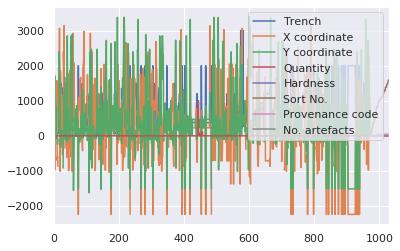

In [30]:
all_data.plot()

In [41]:
location = all_data ['X coordinate'].mean(), all_data ['Y coordinate'].mean()
for i in range(0,len(all_data)): 
  m = folium.Map(location=location,zoom_start=5)
folium.Marker([all_data ['X coordinate'].iloc[i],all_data['Y coordinate'].iloc[i]]).add_to(m)
m

In [44]:
all_data['Gender code'].value_counts()

Ma        367
U         233
ZMa       179
ZMa_Fe    160
ZFe_Ch     46
ZFe        27
Fe         13
Zma_Fe      4
ZCh         1
Name: Gender code, dtype: int64

In [47]:
location = all_data['X coordinate'].mean(), all_data['Y coordinate'].mean()
m = folium.Map(location=location,zoom_start=10,control_scale = True)
for i in range(0,len(all_data)):

    site_size = all_data['Gender code'].iloc[i]
    if site_size == 'FE':
        color = 'blue'
    elif site_size == 'ZFe':
        color = 'green'
    else:
        color = 'red'
    folium.Marker([all_data['X coordinate'].iloc[i],all_data['Y coordinate'].iloc[i]],icon=folium.Icon(color=color)).add_to(m)
    m

ValueError: ignored